In [ ]:
#Read VGG16 model through keras.

In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [ ]:
#Model configurations: 1. weights specifies the weight checkpoints to initialize the model. Include_top determines whether or not the complete connection layer is included. Input_shape sets the size of the input data.

In [2]:
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape=(150,150,3))

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np

In [4]:
base_dir = './datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')

validation_dir = os.path.join(base_dir,'validation')

test_dir = os.path.join(base_dir,'test')

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
#Replace the convolution layer with pre-trained one

In [8]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
#config fine tune block of convolution layer.
#complete model with loss function and optimizer

In [10]:
from keras import optimizers

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=1e-5),
        metrics=['acc'])

In [ ]:
#train model then validate it

In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 182s 2s/step - loss: 0.5205 - acc: 0.7495 - val_loss: 0.2867 - val_acc: 0.8740
Epoch 2/30
100/100 [==============================] - 186s 2s/step - loss: 0.3743 - acc: 0.8245 - val_loss: 0.0754 - val_acc: 0.9060
Epoch 3/30
100/100 [==============================] - 189s 2s/step - loss: 0.3201 - acc: 0.8475 - val_loss: 0.2098 - val_acc: 0.9080
Epoch 4/30
100/100 [==============================] - 190s 2s/step - loss: 0.2899 - acc: 0.8790 - val_loss: 0.1404 - val_acc: 0.8900
Epoch 5/30
100/100 [==============================] - 190s 2s/step - loss: 0.2785 - acc: 0.8760 - val_loss: 0.0418 - val_acc: 0.9190
Epoch 6/30
100/100 [==============================] - 190s 2s/step - loss: 0.2764 - acc: 0.8800 - val_loss: 0.1151 - val_acc: 0.9190
Epoch 7/30
100/100 [==============================] - 188s 2s/step - loss: 0.2242 - acc: 0.9060 - val_loss: 0.0277 - val_acc: 0.9170
Epoch 8/30
100/100 [==============================] - 191s 2s/step - 

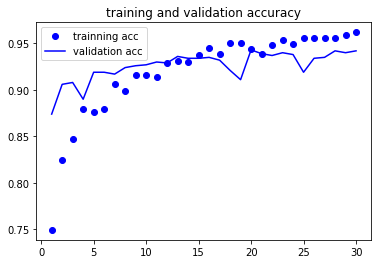

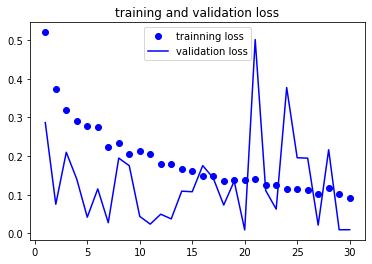

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='trainning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='trainning loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()